# Maximale Flüsse

***

<div class="alert alert-block alert-danger">
<b>Ziel des Notebooks:</b>
    
- Einfache Modellierungsaufgaben mit Graphentheorie und Optimierung lösen 
- Verstehen der grundlegenden Konzepte
    - Netzwerk und Residualnetzwerk
    - $(s,t)$-Fluss und Flusswert
    - Schnitt
- Anwenden von Algorithmen zum Ermitteln von maximalen Flüssen
- ein kurzer Beweis zum Herstellen eines größeren Zusammenhangs

<br>
    
<b>Mathematische Tools:<b>
- Netzwerk
    - Kapazität
    - Schnitt
    - Residualnetzwerk 
        - Residualgraph
        - Residualkapazität
        - $f$-augmentierender Weg
- $(s,t)$-Fluss
    - Flusserhaltung
    - Flusswert
- Algorithmen
- Pseudocode
    
</div>

***

Es ist Samstag - der Tag des großen Fußballspiels - und neben Nico und Ole möchten auch alle anderen aus der Stadt zum Fußballstadion fahren. Dabei benutzen alle die Poststraße. Dementsprechend ist diese Straße völlig überlastet. Nico kennt sich aus und möchte die Bahnhofstraße nehmen, da diese weniger befahren ist. An der nächsten Kreuzung mündet diese allerdings wieder in der viel befahrenen Poststraße. Auch wenn es zum Stadion nach rechts geht, schlägt Ole vor weiter geradeaus über den Kartenweg zu fahren und im Anschluss rechts auf die Mittelstraße abzubiegen. Dies stellt zwar einen Umweg dar, aber immerhin ist diese Straße frei und die beiden gelangen ohne Stau zum Fußballstadion.

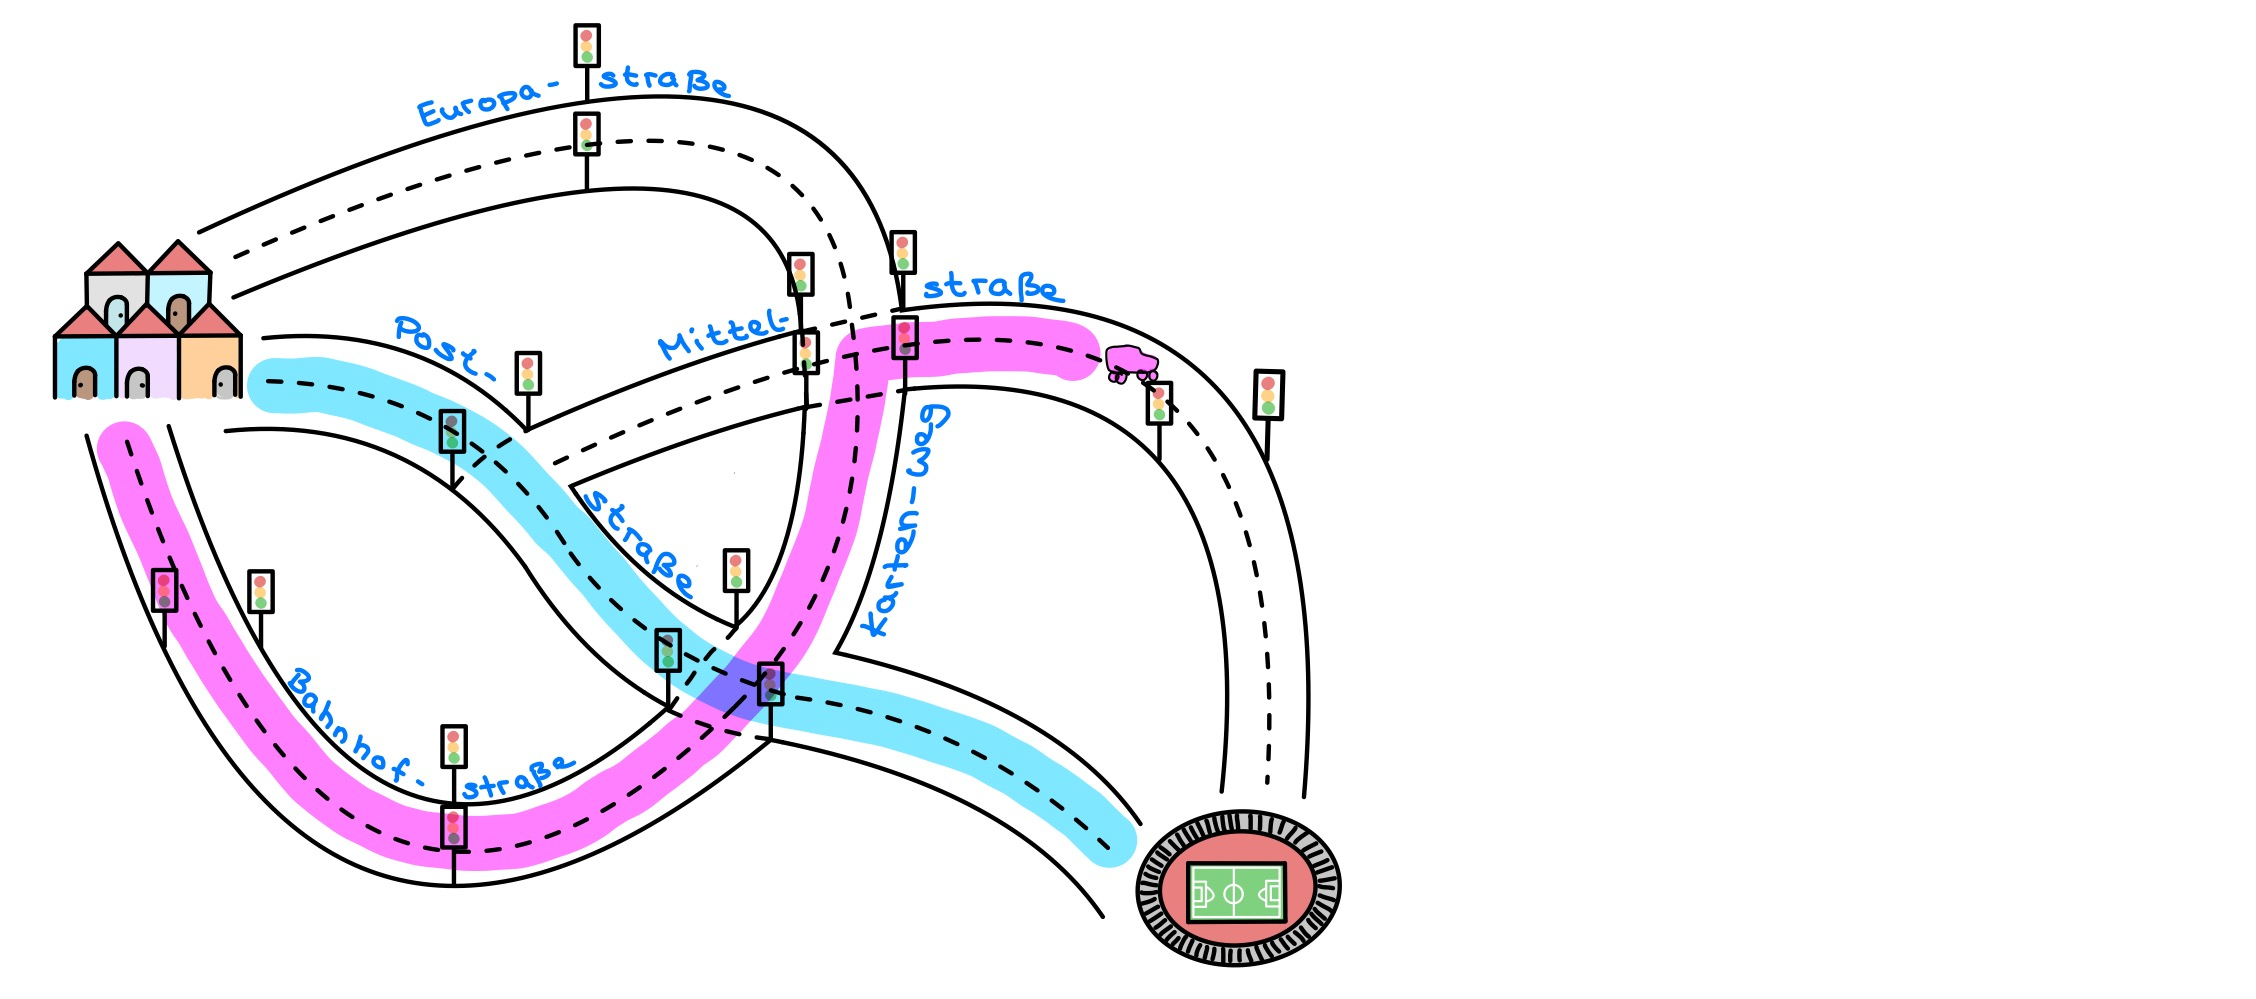

Wenn nun jeder Autofahrer einfach fährt, klappt es anscheinend nicht Stau zu vermeiden. Wie müsste man jetzt vorgehen, damit so viele Autos wie möglich am Fußballstadion ankommen und damit der Verkehr fließt?

Um diese Frage beantworten zu können, wird das Problem zunächst in die Sprache der Graphentheorie übersetzt. Dabei ist es irrelevant ob eine der Straßen kurz oder lang ist oder wo eine Kreuzung auf der Karte abgebildet ist. <br>
Wichtig ist lediglich die Information, welche Ampeln beziehungsweise welche Kreuzungen durch eine bestimmte Straße jeweils verbunden werden und in welche Richtungen die Straßen befahren werden dürfen. <br>
Da die Straßen jedoch unterschiedlich breit sein können, können auch unterschiedlich viele Autos die Straßen gleichzeitig nutzen. Deshalb werden die einzelnen Straßen mit einer Zahl versehen, die die Kapazität der Straße wiedergibt.<br>
Um es noch übersichtlicher zu machen, wird angenommen, dass alle Autofahrer vom gleichen Punkt aus starten, in diesem Fall ist das die Stadt. Dieser Knoten wird im Graphen mit einem $s$ bezeichnet. Genauso wird angenommen, dass alle Autofahrer das gleiche Ziel haben, also dass alle zum Stadion fahren wollen. Dieser Knoten wird mit einem $t$ versehen.

Wird die Karte auf diese Informationen reduziert, ergibt sich der folgende Graph.

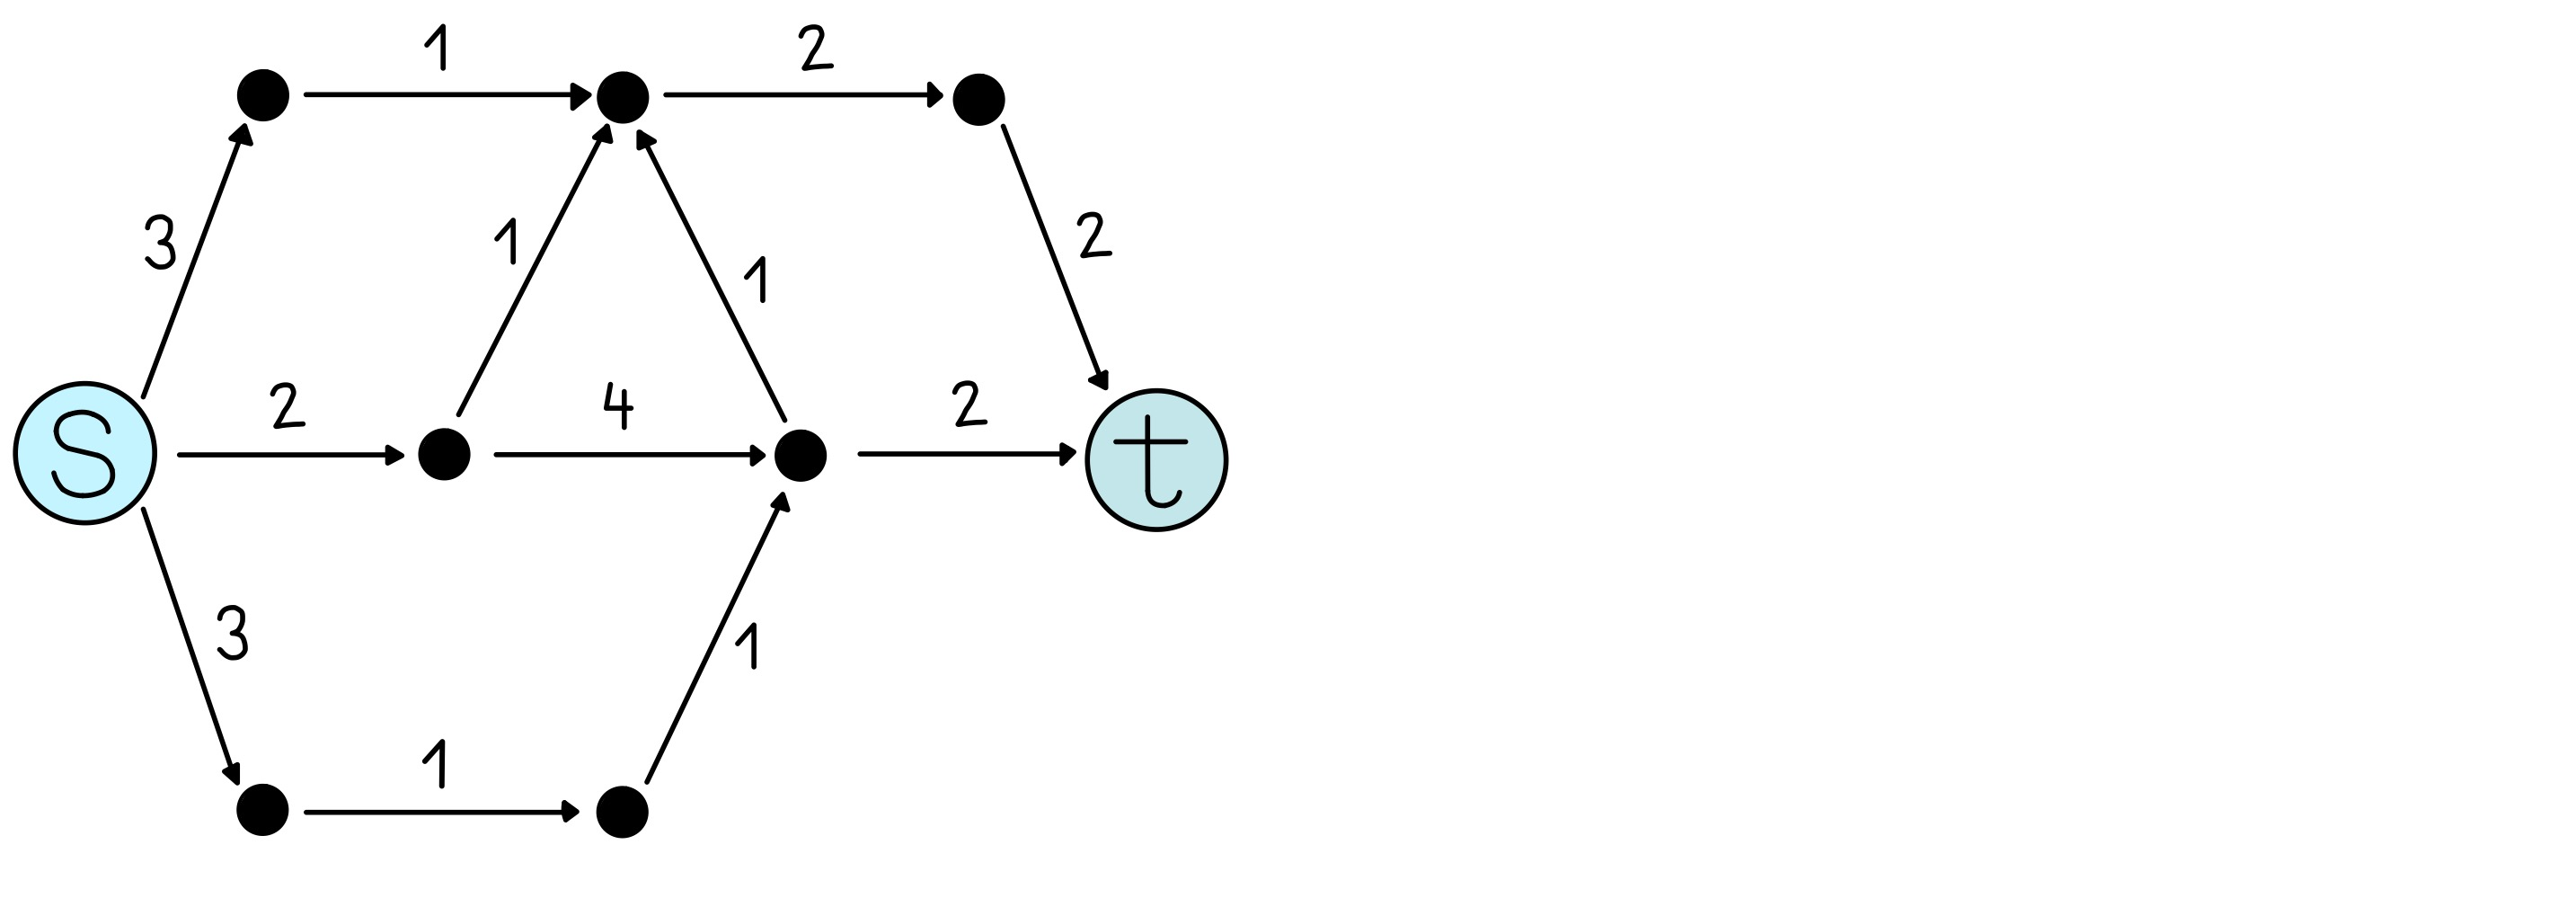

Beim Betrachten dieses Graphen fällt auf, dass nun alles miteinbezogen wurde, was für die Definition eines <b>Netzwerkes</b> nötig ist.

<div class="alert alert-block alert-info">
<b>Netzwerk</b>

Sei $\overrightarrow{G}=(V,E)$ ein gerichteter Graph. Dann ist $N=(G,u,s,t)$ ein <b>Netzwerk</b> mit zwei markierten Knoten $s\in V$, $t\in V$ und einer Kapazitätsfunktion $u(e)$. Dabei bezeichnet $s$ die Quelle und $t$ die Senke des Netzwerks. Die Funktion $u:E\to\mathbb{R}^+$ weist jeder Kante $e\in E$ ihre nichtnegative Kapazität zu.
</div>

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Benennen Sie die Knoten des abgebildeten Graphen $G=(V,E)$.
2. Definieren Sie den Graphen formell, indem Sie die Knotenmenge $V$ und Kantenmenge $E$ angeben.
</div>

Soll nun die Frage beantwortet werden, wie viele Autos maximal ohne Stau durch das Straßennetz von $s$ nach $t$ befördert werden können, muss darauf geachtet werden, dass die Menge an Autos, von der eine jeweilige Straße befahren werden kann, nicht überschritten wird. Zudem dürfen an jeder Ampel oder an jeder Kreuzung nur so viele Autos ankommen, wie auch wegfahren können, da ansonsten dort ein Stau entsteht.

Eine Möglichkeit dafür, wie die Autos das Straßennetz befahren können, ist im Folgenden abgebildet:

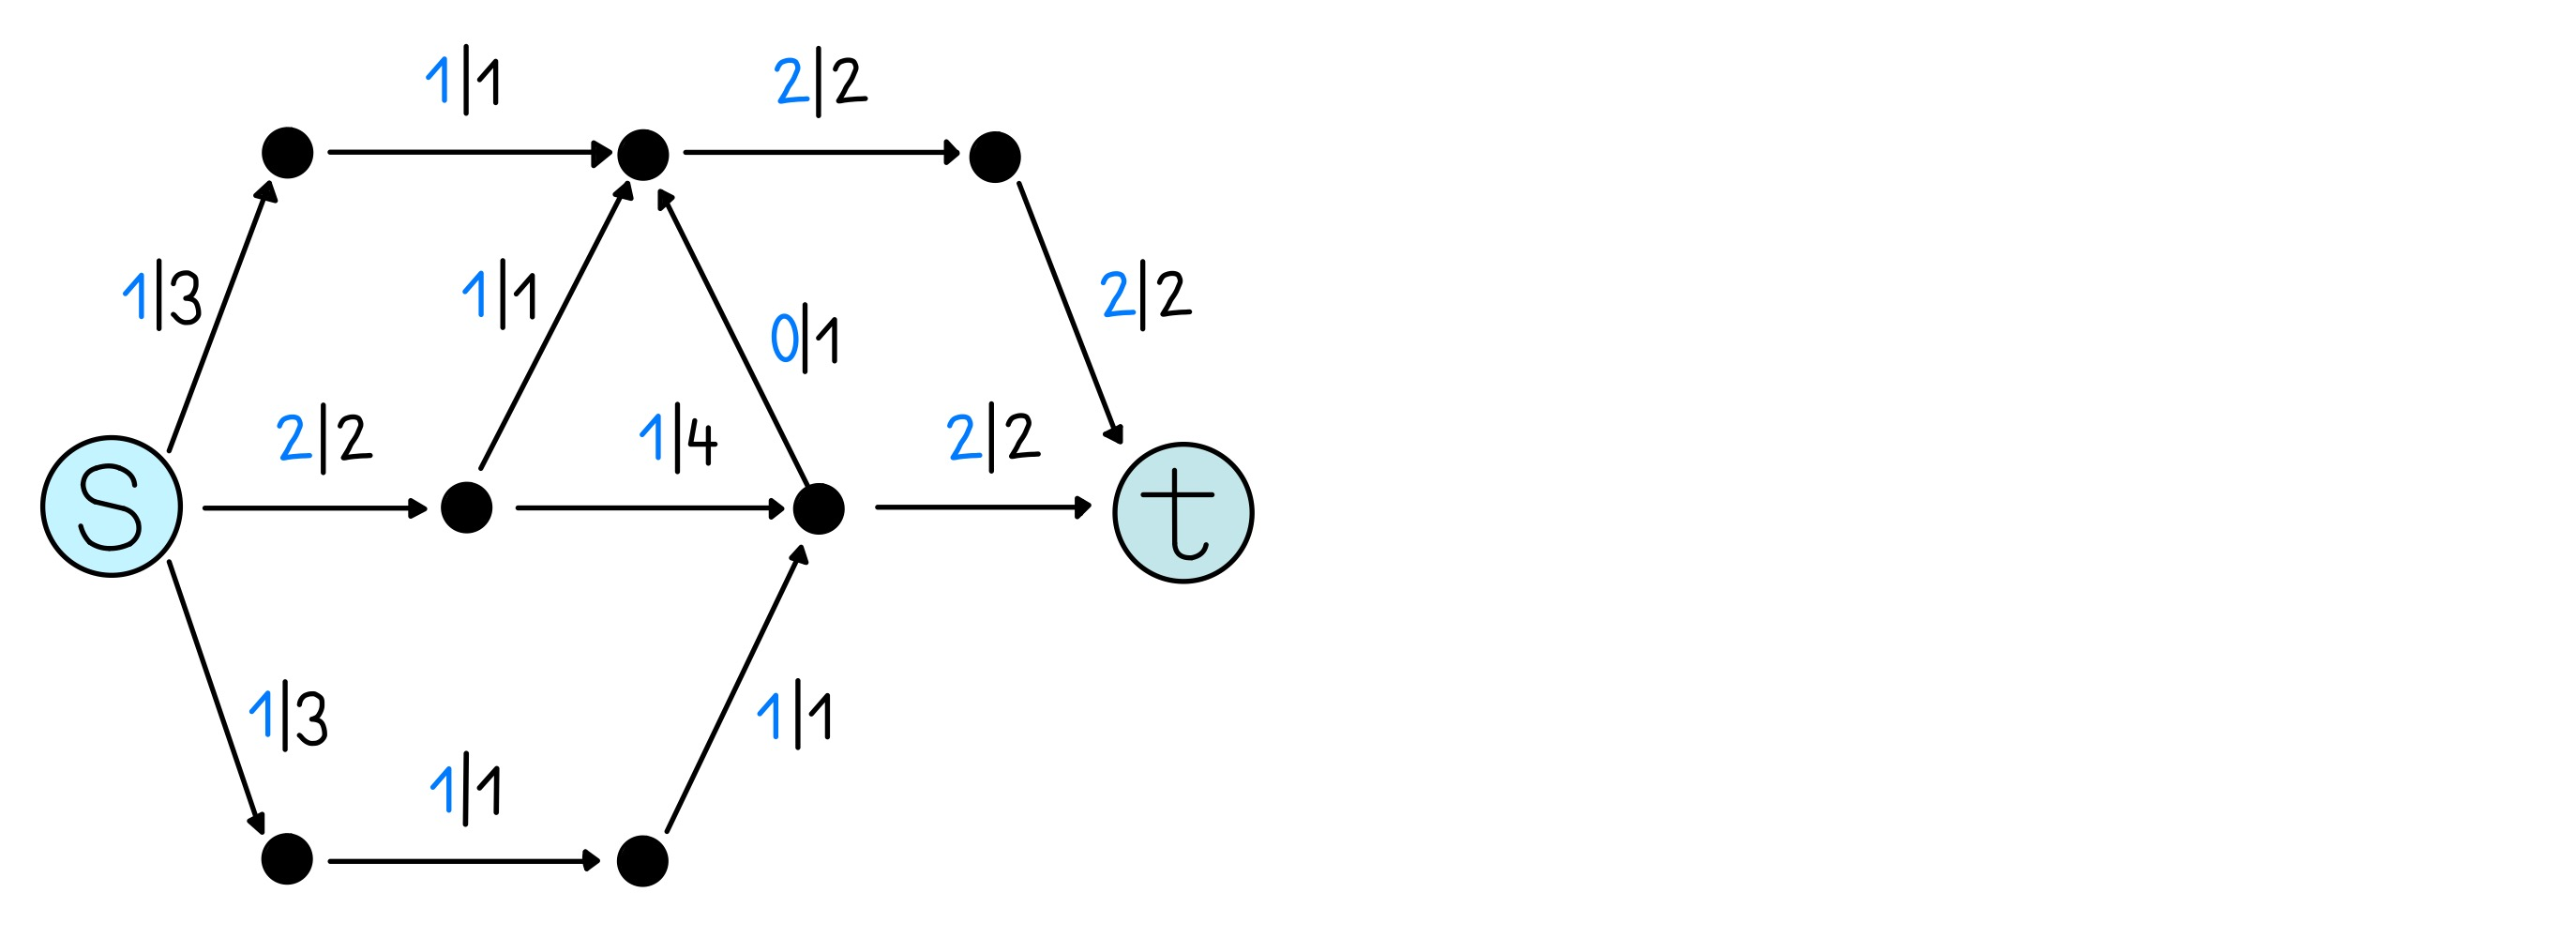

Dabei entspricht die linke blaue Zahl der Menge der Autos, die tatsächlich diese Straße befahren.

Um nun Aussagen darüber treffen zu können, ob dies bereits eine optimale Möglichkeit ist und wenn nicht, wie dann eine bestimmt werden kann, werden noch ein paar Definitionen eingeführt.

<div class="alert alert-block alert-info">
Sei $\overrightarrow{G}=(V,E)$ ein gerichteter Graph und $v\in V$ sei beliebig. Dann wird mit $\delta^+(v)$ die Menge aller Kanten bezeichnet, die von $v$ ausgehen. Mit $\delta^-(v)$ wird die Menge aller Kanten bezeichnet, die in $v$ eingehen.<br>
</div>

<div class="alert alert-block alert-info">
<b>$(s,t)$-Fluss</b>

Die Funktion $f:E\to\mathbb{R}_{\geq 0}$ wird genau dann als Fluss bezeichnet, 
    wenn die Bedingung der <b>Kantenkapazität</b> eingehalten wird, also wenn Folgendes gilt:
    $f(e)\leq u(e)$ für alle $e\in E$.<br>
Somit ist ein Fluss eine Funktion, die jeder Kante $e\in E$ aus dem Netzwerk $N$ einen nichtnegativen Flusswert $f(e)$ zuweist.<br>
Ein Fluss heißt genau dann $(s,t)$-Fluss, wenn zusätzlich an jedem Knoten $v\in V$\\ $\{s,t\}$ die <b>Flusserhaltung</b> gilt. Das bedeutet, dass an jedem Knoten $v\in V$\\ $\{s,t\}$ Folgendes gilt:
    $\sum_{e\in \delta^+(v)} f(e)-\sum_{e\in \delta^-(v)} f(e)=0$
</div>

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Wird durch die oben skizzierte Möglichkeit, wie die Autos durch das Straßennetzwerk fahren könnten, ein $(s,t)$-Fluss definiert? Wenn ja, warum?
2. Ist es möglich auf die Frage, wie viele Autos maximal ohne Stau durch das Straßennetz von $s$ nach $t$ befördert werden können, eine Antwort zu erhalten?
</div>

Dadurch, dass eine Antwort auf die Frage nach der maximalen Menge an Autos, die ohne Stau durch das Straßennetz von S nach T befördert werden kann, gesucht wird, wird ein $(s,t)$-Fluss mit maximalen Wert, also ein sogenannter <b>maximaler Fluss</b>, gesucht.

<div class="alert alert-block alert-info">
<b>Flusswert</b>
    
Der Wert eines $(s,t)$-Flusses ist wie folgt definiert: $value(f)=\sum_{e\in \delta^+(s)} f(e)-\sum_{e\in \delta^-(s)} f(e)$
</div>

Während ein maximaler Fluss in Netzwerken wie im Anwendungsbeispiel aufgrund ihrer Größe noch durch Hinschauen und Ausprobieren gefunden werden kann, wird diese Suche beim Betrachten von größeren Beispielen schnell unübersichtlich und sehr zeitaufwändig.<br>
In solchen Fällen besteht eine Möglichkeit, einen maximalen Fluss in einem Flussnetzwerk mit rationalen Kapazitäten zu bestimmen, in der Anwendung des <b>Algorithmus von Ford und Fulkerson</b>.<br>

Um diesen Algorithmus jedoch anwenden zu können, werden die nachfolgenden Definitionen benötigt. 

<div class="alert alert-block alert-info">
Sei $G=(V,E)$ ein Graph. Dann werden alle $e=(u,v) \in E$ als <b>Vorwärtskanten</b> bezeichnet. Alle $\overleftarrow{e}=(v,u)$ stellen dann die <b>Rückwärtskanten von e</b> dar. Der Graph, der alle Kanten $e\in E$ und alle Rückwärtskanten $\overleftarrow{e}$ von $e$ enthält, wird mit dem Symbol $\overleftrightarrow{G}$ bezeichnet.
</div>

<div class="alert alert-block alert-info">
<b>Residualnetzwerk</b>
    
Das <b>Residual-</b> oder auch <b>Restnetzwerk</b> $N_f$ zu einem Netzwerk $N=(G,u,s,t)$ und einem $(s,t)$-Fluss $f$ ist ein Netzwerk mit denselben markierten Knoten $s$ und $t$ wie das Netzwerk $N$, mit einem <b>Residualgraphen</b> $G_f$ und einer <b>Residualkapazität</b> $u_f$.<br>
Der <b>Residualgraph</b> $G_f$ zu dem Netzwerk $N=(G,u,s,t)$ und dem $(s,t)$-Fluss $f$ ist ein Teilgraph des Graphen $\overleftrightarrow{G}$ und er beinhaltet alle Kanten, deren Residualkapazität ungleich null ist.<br>
Die <b>Residualkapazitäten</b> $u_f$ sind wie folgt für alle Kanten in $\overleftrightarrow{G}$ definiert: <br>
    $u_f(e)=u(e)-f(e)$ für alle $e \in E$<br>
    $u_f(\overleftarrow{e})=f(e)$ für alle $e \in E$<br>
Sie geben also für jede Kante $e \in E$ an, um wie viel der Fluss $f$ auf ihr noch erhöht werden darf ohne die Kantenkapazität von $e$ zu überschreiten und für alle Rückkanten $\overleftarrow{e}$, um wie viel der Fluss $f$ auf der Kante $e$ noch verringert werden darf.
</div>

Da $G_f$ für jede Kante $e=(u,v) \in E$ mit $f(e)>0$ die Rückkante $\overleftarrow{e}=(v,u)$ mit einer Kapazität von $u_f(\overleftarrow{e})=f(e)$ enthält, besteht $G_f$ aus den Kanten, die durch $f$ nicht ausgelastet werden und den Rückkanten, die den Wert von $f$ aufweisen. Somit zeigt das Residualnetzwerk die restliche Kapazität eines Netzwerks an, die nach der Anwendung eines $(s,t)$-Flusses noch übrig ist.

<div class="alert alert-block alert-info">
Ein <b>$f$-augmentierender Weg</b> ist ein Weg von $s$ nach $t$ in $G_f$
</div>

Auf der Grundlage dieser Definitionen kann der <b>Ford-Fulkerson-Algorithmus</b> betrachtet werden.

<div class="alert alert-block alert-info">
    
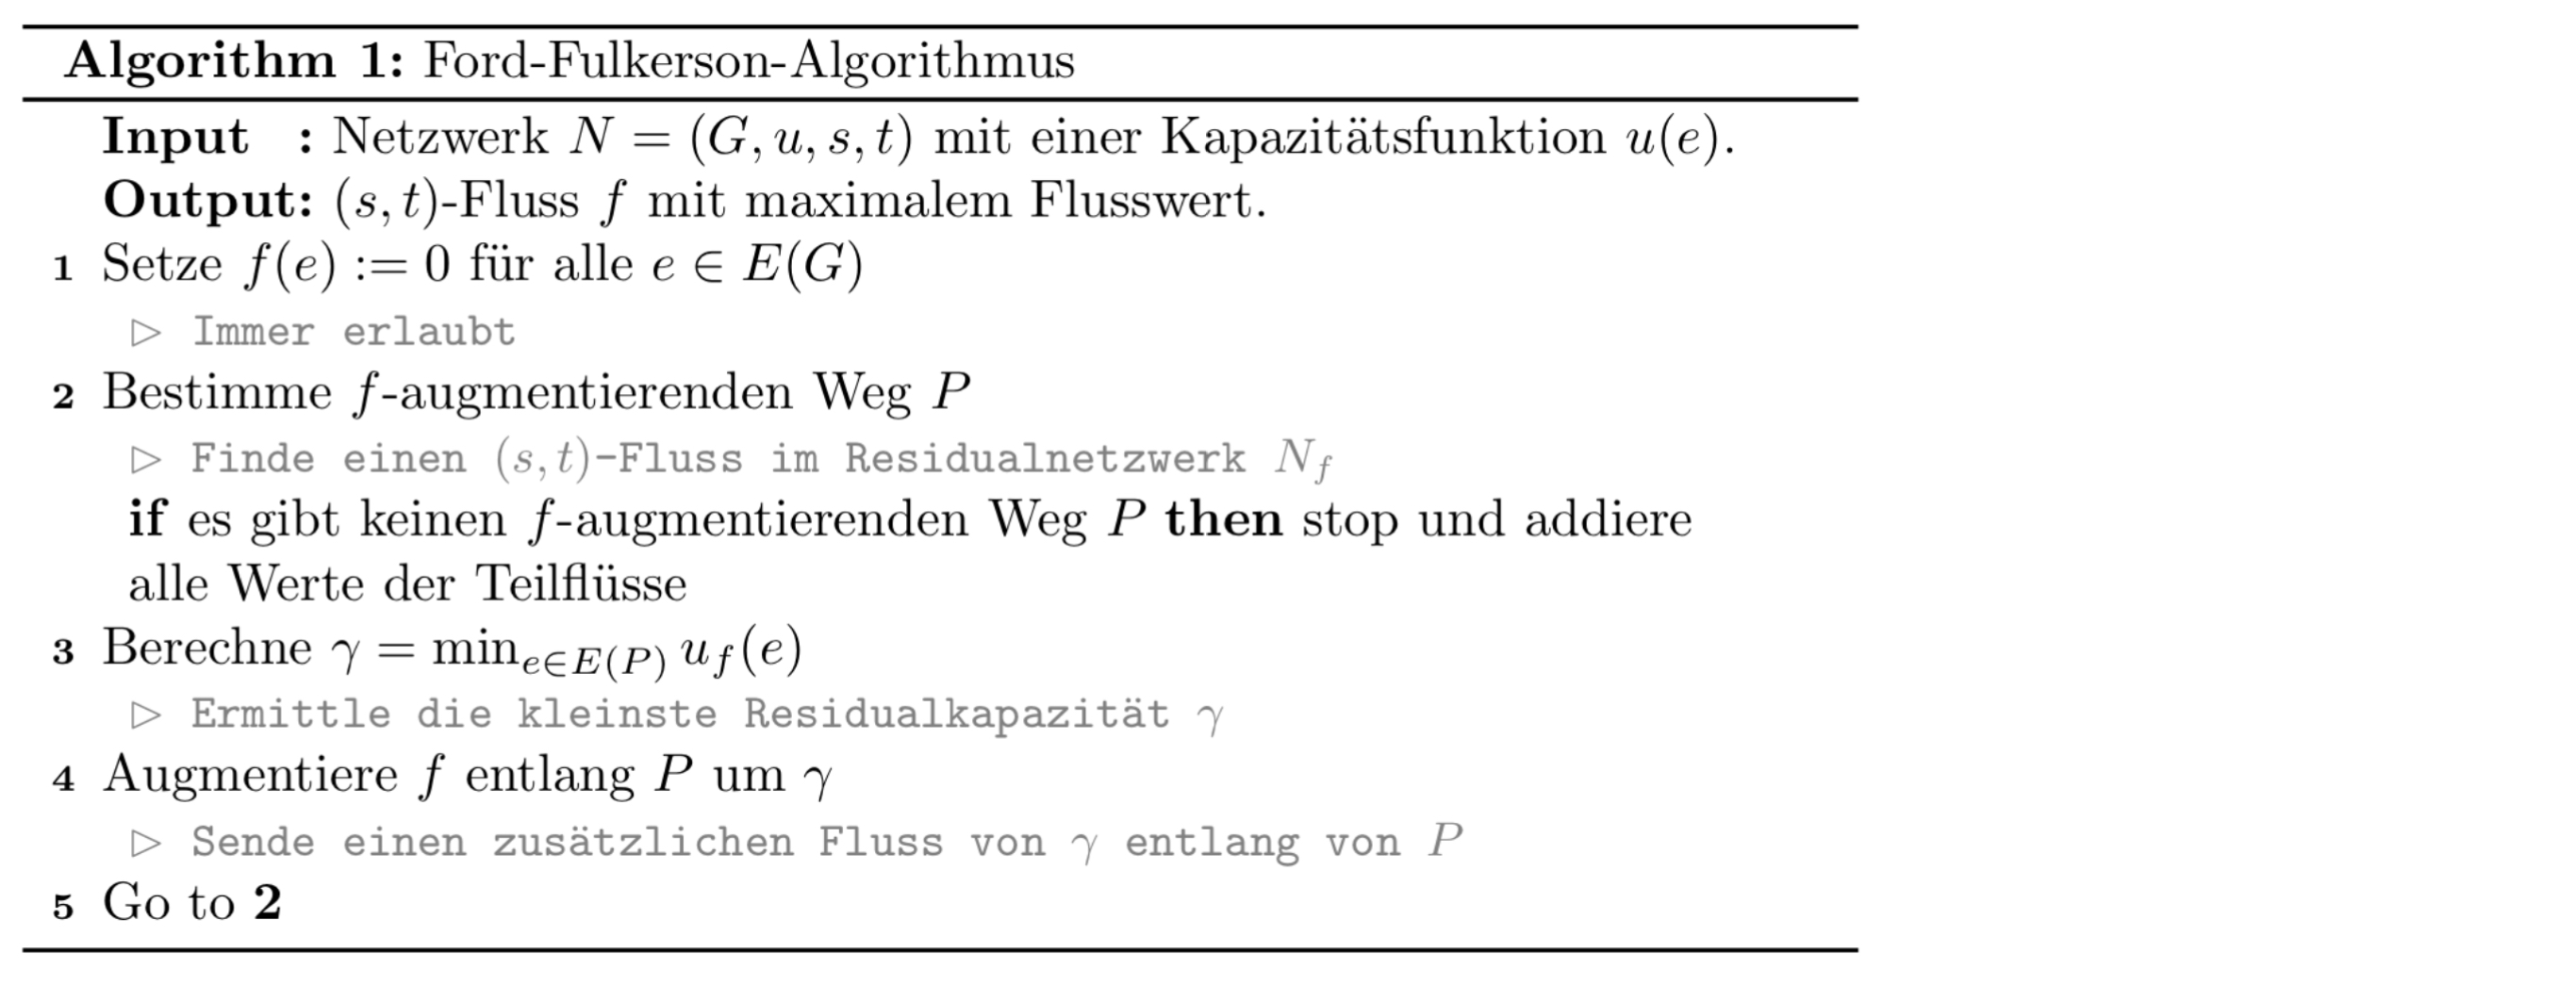
</div>

Die Werte der Teilflüsse sind hier die Werte, die sich für die Flüsse ergeben, die im zweiten Schritt gefunden werden.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Verstehen Sie den Algorithmus und geben Sie die Schritte in eigenen Worten wieder.
2. Wenden Sie den Algorithmus auf das Netzwerk mit dem folgenden Graphen $G$ an.
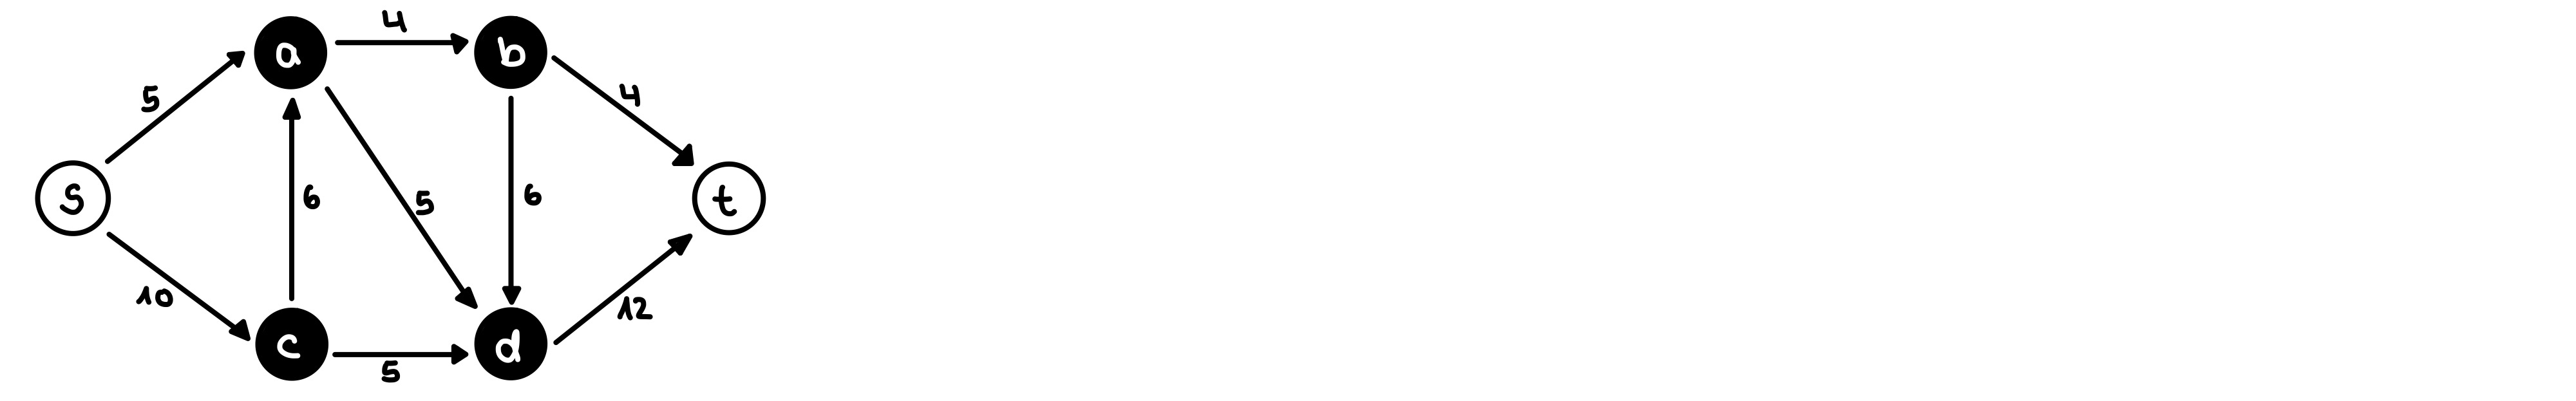
3. Überlegen Sie, warum der Ford-Fulkerson-Algorithmus wirklich den maximalen Flusswert liefert. Denken Sie dazu darüber nach, warum die folgende Aussage sinnvoll ist:<br>
    
Der Flusswert des $(s,t)$-Flusses von einem Netzwerk $N$ ist genau dann maximal, wenn es keinen augmentierenden Pfad, also im Restnetzwerk $N_f$ keinen weiteren Pfad von $s$ nach $t$ gibt.
</div>

Eine andere Möglichkeit den maximalen Fluss eines Netzwerkes zu bestimmen, verläuft über den <b>minimalen Schnitt</b> eines Netzwerkes. Um diese Methode einzuführen, wird zunächst definiert, was ein <b>Schnitt</b> im Generellen ist.

<div class="alert alert-block alert-info">
<b>Schnitt</b>

Sei $N$ ein Netzwerk. Dann ist ein <b>Schnitt</b> die Aufteilung der Knoten $v\in V$ in Teilmengen $S$ und $T$, disjunkt sind und für die gilt $s\in S$ und $t\in T$.<br>
Die <b>Kapazität des Schnittes</b> $u(S,T)$ ergibt sich aus der Summe der Kapazitäten aller Kanten von $S$ nach $T$.<br>
Also gilt: $u(S,T)=\sum_{v\in S,w\in T|(v,w)\in E} u(v,w)$.
</div>

<div class="alert alert-block alert-success">
    
### Aufgabe
***
    
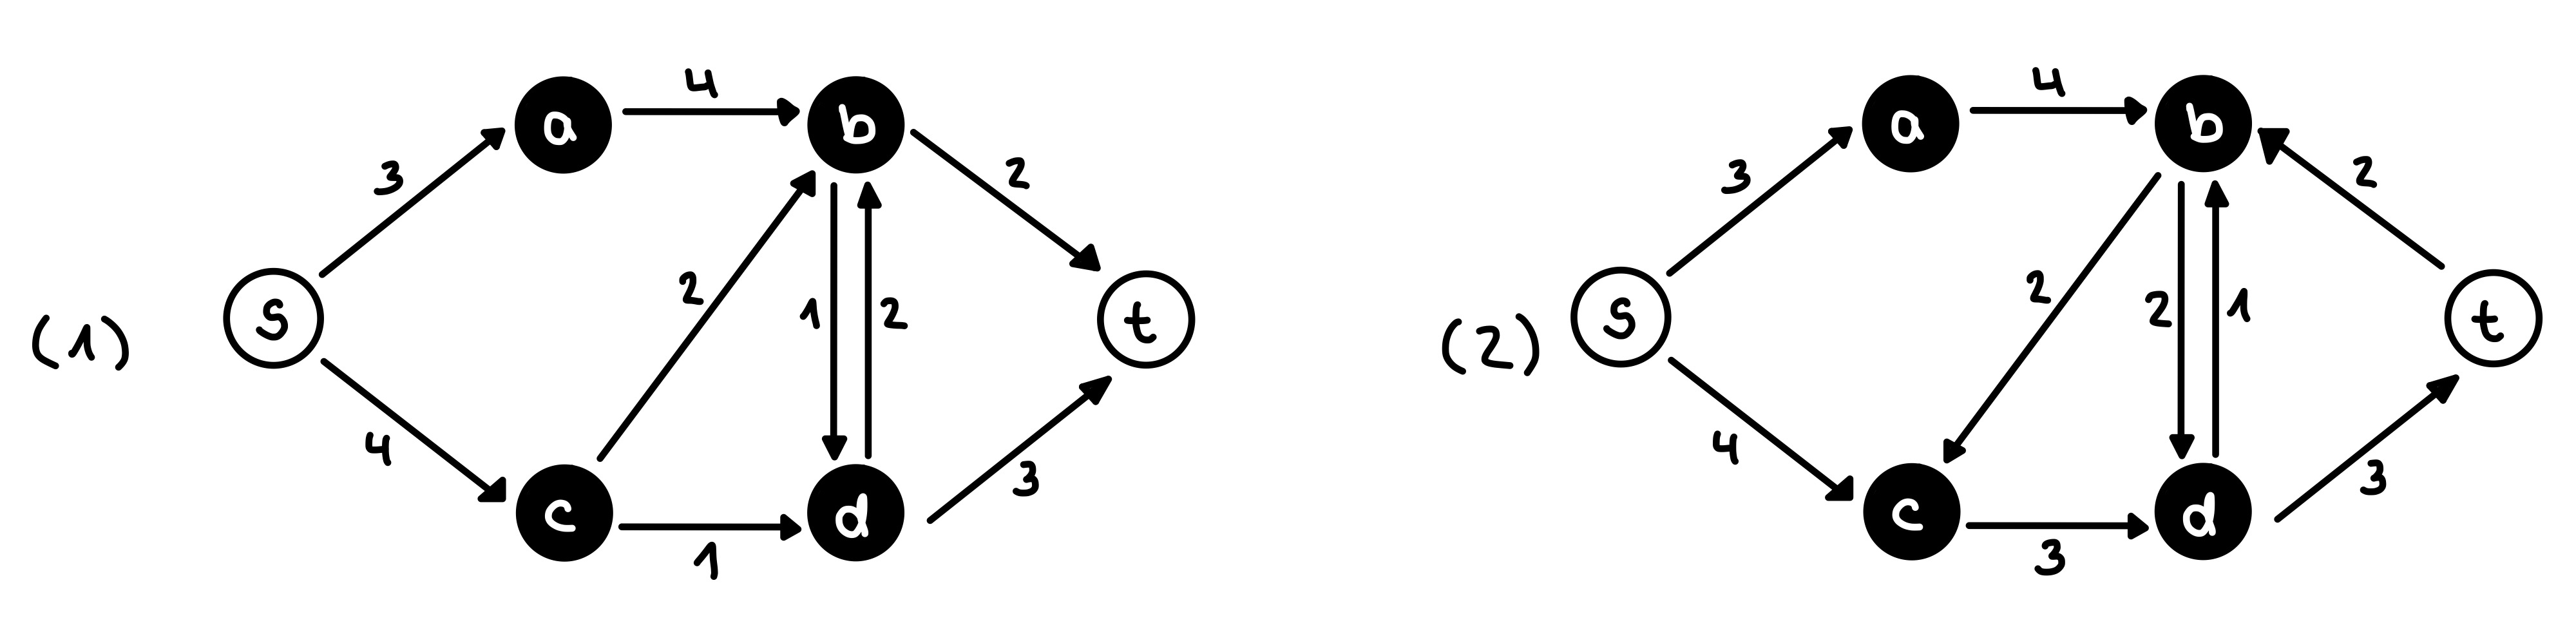<br>
Bestimmen Sie jeweils die Kapazität der Schnitte für die  Netzwerke (1) und (2), wenn gilt:<br>
1. $S=\{s,a,b,c\}$
2. $S=\{s,a,b\}$
3. $S=\{s,a,c,d\}$
</div>

Jetzt kann der Zusammenhang zwischen dem maximalen Fluss und dem Schnitt formuliert werden.

<div class="alert alert-block alert-info">
<b>Max-Flow-Min-Cut-Theorem</b>

Ein maximaler Fluss im Netzwerk hat genau den Wert eines minimalen Schnittes.
</div>

Durch den formulierten Zusammenhang zwischen dem maximalen Fluss und dem minimalen Schnitt, ergibt sich eine zweite Möglichkeit den maximalen Fluss eines Netzwerkes zu bestimmen.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Schreiben Sie einen Algorithmus zur Bestimmung der Kanten, durch die beim minimalen Schnitt geschnitten wird und geben Sie diesen als Pseudocode an.<br>
    Tipp: Beginnen Sie den Algorithmus nachdem das Residualnetzwerk $N_f$ zum maximalen Fluss $f$ mit dem Residualgraphen $G_f$ aufgestellt wurde. Welche Knoten von $G_f$ sollten dann zu $S$ oder $T$ gehören, damit die Kanten in $G$, die den maximalen Fluss bestimmen, geschnitten werden?
2. Bestimmen Sie den maximalen Fluss des Netzwerkes, welches durch den Graphen $G$ aus der vorletzten Aufgabe dargestellt wird, über den minimalen Schnitt. 
</div>

Jetzt sind zwei verschiedene Verfahren zur Bestimmung des maximalen Flusses eingeführt worden. Somit können beide nun verglichen werden.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
    
Erscheint eines der beiden Verfahren sinnvoller zum Lösen der Einstiegsaufgabe? Wo liegen die Unterschiede?
</div>

Jetzt ist das ganze Werkzeug vorhanden, um das Problem der Stadtbewohner zu lösen und herauszufinden, wie die Straßen zum Stadion am besten befahren werden sollten.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Beantworten Sie die Frage vom Anfang: Wie viele Autos können maximal ohne Stau durch das Straßennetz von der Stadt $s$ zum Stadion $t$ befördert werden? Prüfen Sie anschließend Ihr Ergebnis.
2. Vergleichen Sie das Ergebnis mit der bereits gegebenen Möglichkeit, wie das Straßennetz befahren werden könnte. Hat diese Möglichkeit bereits einen maximalen Fluss angegeben? Wenn ja, wäre das direkt zu sehen gewesen?
</div>

Es sind jetzt verschiedene mathematische Begriffe thematisiert worden. Wie diese untereinander zusammenhängen, soll im weiteren Verlauf genauer betrachtet und auch belegt werden.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
    
1. Setzen Sie nun die folgenden drei Aussagen in einen Zusammenhang:<br>
    i) $f$ ist ein maximaler Fluss<br>
    ii) der Residualgraph enthält keinen augmentieren Pfad<br>
    iii) für mindestens einen Schnitt gilt: $u(S,T)=value(f)$
2. Beweisen Sie diesen Zusammenhang und beantworten Sie die Frage, inwiefern Sie damit das Max-Flow-Min-Cut-Theorem bewiesen haben.
</div>

Um die Frage beantworten zu können, ob es noch einen anderen, vielleicht sinnvolleren Weg zum Bestimmen maximaler Flüsse gibt, wird ein weiterer Weg untersucht. 

<div class="alert alert-block alert-success">
    
### Recherche-Aufgabe
***
Der Ford-Fulkerson-Algorithmus ist nicht der einzige Algorithmus, um maximale Flüsse in einem Netzwerk zu bestimmen. Ein leicht abgewandelter Algorithmus ist der Edmonds-Karp-Algorithmus. Lösen Sie die folgenden Aufgaben mithilfe von Recherche.  
1. Schreiben Sie einen Pseudocode für den Edmonds-Karp-Algorithmus.
2. Gehen Sie den Edmonds-Karp-Algorithmus an einem von Ihnen gewählten Netzwerk durch.
2. Wo liegen die Unterschiede zum Ford-Fulkerson-Algorithmus?
</div>

Jetzt ist betrachtet worden, wie die einzelnen Begrifflichkeiten untereinander zusammenhängen und es ist darüber nachgedacht worden, welche Lösungsstrategie generell sinnvoll ist und welche sich am ehesten im Anwendungsbeispiel anbietet.<br>
Somit fehlt noch die Betrachtung der Zusammenhänge dieser Begriffe mit allem anderen. Also zum Beispiel was das Kennen eines maximalen Flusses überhaupt bedeutet und inwiefern dieses Wissen im praktischen Alltag Anwendung finden kann.

<div class="alert alert-block alert-success">
    
### Aufgabe
***

Wenn der Weg zum Stadion optimiert werden soll, ist eine Möglichkeit das Ausbauen (nicht neu bauen) von Straßen, so dass mehr Autos gleichzeitig eine Straße befahren können. Dadurch würde sich dann nämlich die Kantenkapazität im Graphen des Straßennetzwerkes ändern. Finden Sie eine Möglichkeit, wie insgesamt 7 Autos gleichzeitig fahren (i) und wie alle Kapazitäten der Kanten genutzt werden (ii) können. Da so wenig Straßen wie möglich umgebaut werden sollen, achten Sie darauf die Anzahl an umzubauenden Straßen zu minimieren. Lohnt sich der jeweilige Ausbau?
</div>

Nachdem bis hierher das Finden von maximalen Flüssen in Netzwerken im Vordergrund stand, wird nun kurz das Augenmerk auf <b>kostenoptimale Flüsse</b> gelegt. Es gibt nämlich Anwendungen, in denen für die Benutzung jeder Kante in einem Netzwerk Kosten anfallen. Diese Kosten sind proportional zu der Höhe des Flusses, der über die entsprechende Kante transportiert wird. Wenn sich also die Kosten der einzelnen Kanten unterscheiden, kann es passieren, dass zwei Flüsse von derselben Größe unterschiedlich hohe Kosten verursachen. Gesucht wird dann also ein maximaler Fluss, der minimale Kosten aufweist.

<div class="alert alert-block alert-info">
Die Kosten eines Flusses $f$ werden mit einer <b>Kostenfunktion</b> $k:E \to \mathbb{Z}$ berechnet. Dabei fallen für jede Kante $e\in E$ mit einem Fluss $f(e)\geq 0$ Kosten in Höhe von $f(e)\cdot k(e)$ an.<br>
Für die <b>Gesamtkosten</b> des Flusses $f$ im Netzwerk ergibt sich also: $k(f)=\sum_{f(e)>0}f(e)\cdot k(e)$.
</div>

Somit hat eine Kante $e\in E$ mit einem negativen Kostenwert $k(e)<0$ zur Folge, dass bei einer Erhöhung des Flusses $f$ durch diese Kante $e$ um 1 ein Gewinn mit dem Wert $−k(e)$ entsteht.<br>
Da die Erniedrigung des Flusses $f(e)>0$ auf einer Kante $e$ um einen bestimmten Wert $w\leq f(e)$ gleichbedeutend ist mit einer Erhöhung des Flusses auf der  Rückwärtskante $\overleftarrow{e}$ von $e$ im Residualnetzwerk um denselben Wert und weil die Kostenfunktion auch für das Residualnetzwerk gelten soll, muss Folgendes erfüllt sein: 

<div class="alert alert-block alert-info">
Wenn zu einer Kante $e\in E$ ebenfalls die Rückwärtskante $\overleftarrow{e}$ in $E$ enthalten ist, muss $k(\overleftarrow{e})=-k(e)$ gelten.
</div>

***

<div class="alert alert-block alert-danger">
    
### Rückblick-Aufgabe
***
In diesem Notebook wurde sich ausführlich mit dem Flussproblem beziehungsweise mit den Möglichkeiten zum Finden und Identifizieren von maximalen Flüssen beschäftigt. Jetzt wurde darauf hingewiesen, dass bei der Auswahl des maximalen Flusses, sofern es mehrere maximale Flüsse mit demselben Flusswert gibt, ebenfalls die Gesamtkosten des Flusses betrachtet werden können.<br>
<br>
Finden Sie heraus, wie ein kostenoptimaler Fluss gefunden werden kann und überlegen Sie sich ein realistisches Anwendungsbeispiel, in dessen Modellierung kostenoptimale Flüsse von Bedeutung sind. Erstellen Sie exemplarisch dieses Modell und begründen Sie an welcher Stelle der kostenoptimale Fluss relevant ist.
</div>

### Literaturhinweise
- C. Schmidt, Graphentheorie und Netzwerkanalyse: Eine kompakte Einführung mit Beispielen, Übungen und Lösungsvorschlägen, Springer-Verlag, 2023.
- M. Hoefer, Flüsse und Matchings: Effiziente Algorithmen, Uni Frankfurt, 2019.
- Flüsse und Schnitte in Netzwerken, In: Wikipedia, die freie Enzyklopädie, https://de.wikipedia.org/wiki/Flüsse_und_Schnitte_in_Netzwerken
- J. Köbler, Graphalgorithmen, Vorlesungsskript, Humboldt-Universität zu Berlin, Juni 2013.
- B. Korte, J. Vygen, Kombinatorische Optimierung: Theorie und Algorithmen, 3. Auflage, Springer-Verlag, 2018.
- Max-Flow-Min-Cut-Theorem, In: Wikipedia, die freie Enzyklopädie, https://de.wikipedia.org/wiki/Max-Flow-Min-Cut-Theorem
- C. Büsing, Maximale Flüsse: Graphen und Netzwerkoptimierung, Springer-Verlag, 2010.
- H. Alt, M. Dietzfelbinger, R. Reischuk, C. Scheideler, H. Vollmer, B. Vöcking, D. Wagner, Taschenbuch der Algorithmen, Springer-Verlag, 2008.

***